## 01. Практический кейс. Изучение признаков данных (используя тестовые данные)

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [40]:
pd.set_option('display.max_columns', None)

### Смотрим на признаки данных

Для начала, конечно же, откроем файлы. Нужно посчитать кол-во имеющихся данных - имеем 34686 тестовых сэмплов в датафрейме. После этого, необходимо посмотреть на колонки датафрейма; они соответствуют признакам, которые мы будем использовать для предсказания цены авто. 

In [41]:
# open data
test_df = pd.read_csv('data/test.csv')
sample_submission_df = pd.read_csv('data/sample_submission.csv')

In [42]:
print(f"Количество тестовых сэмплов: {len(test_df)}")
print(f"Количество сэмплов в сэмпл сабмишне: {len(sample_submission_df)}")

Количество тестовых сэмплов: 34686
Количество сэмплов в сэмпл сабмишне: 34686


In [43]:
print(f"Колонки тестового датафрейма: {list(test_df.columns)}")

Колонки тестового датафрейма: ['bodyType', 'brand', 'car_url', 'color', 'complectation_dict', 'description', 'engineDisplacement', 'enginePower', 'equipment_dict', 'fuelType', 'image', 'mileage', 'modelDate', 'model_info', 'model_name', 'name', 'numberOfDoors', 'parsing_unixtime', 'priceCurrency', 'productionDate', 'sell_id', 'super_gen', 'vehicleConfiguration', 'vehicleTransmission', 'vendor', 'Владельцы', 'Владение', 'ПТС', 'Привод', 'Руль', 'Состояние', 'Таможня']


Нужно подробнее изучить типы данных в каждой колонке. Для этого, пройдемся методом value_counts() для каждой колонки (с типом данных Series) и заодно прикинем распределение значений.

In [44]:
test_df['brand'].value_counts()

BMW           4473
VOLKSWAGEN    4404
NISSAN        4393
MERCEDES      4180
TOYOTA        3913
AUDI          3421
MITSUBISHI    2843
SKODA         2741
VOLVO         1463
HONDA         1150
INFINITI       871
LEXUS          834
Name: brand, dtype: int64

In [45]:
test_df['car_url'].value_counts().head()

https://auto.ru/cars/used/sale/nissan/murano/1100777446-0dc04ba0/               1
https://auto.ru/cars/used/sale/mercedes/s_class_maybach/1094251210-7785c32b/    1
https://auto.ru/cars/used/sale/volkswagen/passat_cc/1084061959-42b68135/        1
https://auto.ru/cars/used/sale/volkswagen/golf/1099603172-7b7884bc/             1
https://auto.ru/cars/used/sale/mitsubishi/outlander/1101090515-42025ce4/        1
Name: car_url, dtype: int64

In [46]:
test_df['complectation_dict'].isna().value_counts()

True     28268
False     6418
Name: complectation_dict, dtype: int64

In [47]:
test_df['description'].isna().value_counts()

False    34686
Name: description, dtype: int64

In [48]:
test_df['engineDisplacement'].value_counts().head()

2.0 LTR    7391
1.6 LTR    4973
3.0 LTR    3915
1.8 LTR    3349
2.5 LTR    2477
Name: engineDisplacement, dtype: int64

In [49]:
test_df['enginePower'].value_counts().head()

249 N12    1708
150 N12    1699
110 N12    1039
170 N12     977
105 N12     955
Name: enginePower, dtype: int64

In [50]:
test_df['equipment_dict'].value_counts().head()

{"leather":true}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           108
{"gbo":true}                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [51]:
test_df['fuelType'].value_counts().head()

бензин     28601
дизель      5800
гибрид       223
электро       55
газ            7
Name: fuelType, dtype: int64

In [52]:
test_df['image'].value_counts().head()

https://avatars.mds.yandex.net/get-verba/216201/2a000001609d0005e0912c12a896bbda4ab1/wizardv3mr     13
https://avatars.mds.yandex.net/get-verba/216201/2a000001609bda17487cc63d8b957ab4aab2/wizardv3mr      9
https://avatars.mds.yandex.net/get-verba/1030388/2a000001609cf6746b94cf8334836265daaf/wizardv3mr     8
https://avatars.mds.yandex.net/get-verba/787013/2a000001609d6c09eb305345ee1ea7e7bd15/wizardv3mr      8
https://avatars.mds.yandex.net/get-verba/216201/2a0000016099a4e6be992d7b50134fd908fd/wizardv3mr      7
Name: image, dtype: int64

In [53]:
test_df['mileage'].value_counts().head()

200000    436
150000    382
300000    381
180000    347
250000    346
Name: mileage, dtype: int64

In [54]:
test_df['modelDate'].value_counts().head()

2010    2503
2013    2275
2008    2243
2011    2173
2006    2169
Name: modelDate, dtype: int64

In [55]:
test_df['model_info'].value_counts().head()

{"code":"OCTAVIA","name":"Octavia","ru_name":"Октавия","morphology":{"gender":"FEMININE"},"nameplate":{"code":"","name":"","semantic_url":""}}    1404
{"code":"LANCER","name":"Lancer","ru_name":"Лансер","morphology":{},"nameplate":{"code":"","name":"","semantic_url":""}}                           843
{"code":"PASSAT","name":"Passat","ru_name":"Пассат","morphology":{},"nameplate":{"code":"","name":"","semantic_url":""}}                           776
{"code":"A6","name":"A6","ru_name":"А6","morphology":{},"nameplate":{"code":"","name":"","semantic_url":""}}                                       757
{"code":"POLO","name":"Polo","ru_name":"Поло","morphology":{},"nameplate":{"code":"","name":"","semantic_url":""}}                                 724
Name: model_info, dtype: int64

In [56]:
test_df['model_name'].value_counts().head()

OCTAVIA     1418
5ER         1026
LANCER       855
E_KLASSE     809
PASSAT       782
Name: model_name, dtype: int64

In [57]:
test_df['name'].value_counts().head()

1.6 AT (110 л.с.)         631
1.6 MT (102 л.с.)         410
1.6 MT (110 л.с.)         314
2.0 CVT (141 л.с.) 4WD    309
1.4 AMT (122 л.с.)        308
Name: name, dtype: int64

In [58]:
test_df['numberOfDoors'].value_counts()

5    18703
4    14126
2     1206
3      650
0        1
Name: numberOfDoors, dtype: int64

In [59]:
test_df['priceCurrency'].value_counts()

RUB    34686
Name: priceCurrency, dtype: int64

In [60]:
test_df['productionDate'].value_counts()

2012    2798
2008    2606
2011    2589
2013    2488
2014    2134
        ... 
1936       1
1904       1
1967       1
1960       1
1952       1
Name: productionDate, Length: 69, dtype: int64

In [61]:
test_df['super_gen'].value_counts().head()

{"id":"6214876","displacement":1598,"engine_type":"GASOLINE","gear_type":"FORWARD_CONTROL","transmission":"MECHANICAL","power":105,"power_kvt":77,"human_name":"1.6 MT (105 л.с.)","acceleration":10.5,"clearance_min":170,"fuel_rate":6.5}    193
{"id":"20726520","displacement":1598,"engine_type":"GASOLINE","gear_type":"FORWARD_CONTROL","transmission":"AUTOMATIC","power":110,"power_kvt":81,"human_name":"1.6 AT (110 л.с.)","acceleration":11.7,"clearance_min":163,"fuel_rate":5.9}    159
{"id":"4561004","displacement":1798,"engine_type":"GASOLINE","gear_type":"FORWARD_CONTROL","transmission":"AUTOMATIC","power":152,"power_kvt":112,"human_name":"1.8 AT (152 л.с.)","acceleration":8.8,"clearance_min":164,"fuel_rate":7.7}     148
{"id":"7277667","displacement":1598,"engine_type":"GASOLINE","gear_type":"FORWARD_CONTROL","transmission":"VARIATOR","power":117,"power_kvt":86,"human_name":"1.6 CVT (117 л.с.)","acceleration":11.5,"clearance_min":180,"fuel_rate":6.3}     139
{"id":"2404949","displacemen

In [62]:
test_df['vehicleConfiguration'].value_counts().head()

ALLROAD_5_DOORS AUTOMATIC 3.0    2389
SEDAN AUTOMATIC 2.0              1610
ALLROAD_5_DOORS AUTOMATIC 2.0    1327
ALLROAD_5_DOORS VARIATOR 2.0     1323
SEDAN MECHANICAL 1.6             1314
Name: vehicleConfiguration, dtype: int64

In [63]:
test_df['vehicleTransmission'].value_counts().head()

автоматическая      19596
механическая         7209
вариатор             3999
роботизированная     3882
Name: vehicleTransmission, dtype: int64

In [64]:
test_df['vendor'].value_counts().head()

EUROPEAN    20682
JAPANESE    14004
Name: vendor, dtype: int64

In [65]:
test_df['Владельцы'].value_counts().head()

3 или более    15957
1 владелец      9459
2 владельца     9270
Name: Владельцы, dtype: int64

In [66]:
test_df['Владение'].value_counts().head()

1 год и 10 месяцев    209
2 года                197
1 год                 194
1 год и 1 месяц       193
1 год и 2 месяца      187
Name: Владение, dtype: int64

In [67]:
test_df['ПТС'].value_counts().head()

Оригинал    30098
Дубликат     4587
Name: ПТС, dtype: int64

In [68]:
test_df['Привод'].value_counts().head()

передний    15565
полный      15020
задний       4101
Name: Привод, dtype: int64

In [69]:
test_df['Руль'].value_counts().head()

Левый     33287
Правый     1399
Name: Руль, dtype: int64

In [70]:
test_df['Состояние'].value_counts().head()

Не требует ремонта    34686
Name: Состояние, dtype: int64

In [71]:
test_df['Таможня'].value_counts().head()

Растаможен    34686
Name: Таможня, dtype: int64

### Подведем итоги предварительного исследования признаков

Все признаки:

- bodyType - тип кузова (седан, внедорожник 5 дв., лифтбек, хэтчбек 5 дв., универсал 5 дв и т.д.)
- brand - марка авто
- car_url - ссылка на страницу объявления
- color - цвет
- complectation_dict - детали комплектации (даны не всегда)
- description - описание объявления
- engineDisplacement - объем двигателя (в литрах)
- enginePower - мощность двигателя (в л.с.)
- equipmentDict - больше деталей комплектации
- fuelType - тип потребляемого топлива
- image - ссылка на изображение
- mileage - пробег
- modelDate - год выпуска данной модели авто
- model_info - детали о модели
- model_name - название модели
- name - объем-коробка передач-мощность двигателя
- numberOfDoors - кол-во дверей
- parsing_unixtime - когда объявление было спарсено (время Unix)
- priceCurrency - валюта (все сэмплы в рублях)
- productionDate - год выпуска авто
- sell_id - уникальный идентификатор объявления
- super_gen - детали двигателя (повторно) + клиренс + потребление топлива
- vehicleConfiguration - конфигурация авто (тип кузова-коробка передач-объем двигателя)
- vehicleTransmission - коробка передач (автоматическая, механическая, вариатор, роботизированная)
- vendor - страна-производитель (EUROPEAN, JAPANESE)
- Владельцы - кол-во предыдущих владельцев авто
- Владение - период владения авто
- ПТС - паспорт технического средства
- Привод - 12% сэмплов с задним приводом, 45% с передним, 43% с полным
- Руль - 96% сэмплов с левым рулем
- Состояние - все сэмплы не требуют ремонта
- Таможня - все сэмплы растаможены

Не используем:

- car_url - не дает никакой информации для модели; разный для каждого авто
- complectation_dict - непостоянный набор данных о комплектации авто; у ~82% авто нет данного атрибута
- description - тяжело анализировать текстовое описание (необходимо анализировать текст); у каждого авто есть этот атрибут
- image - тяжело анализировать (необходимо применять компьютерное зрение); не дает никакой информации для модели
- model_info - та же информация хранится в model_name
- name - повторяющаяся информация (объем двигателя-мощность-трансмиссия)
- parsing_unixtime - для модели не имеет никакой информации
- priceCurrency - все в рублях (если нет, то можно перевести по курсу на дату парсинга)
- vehicleConfigurateion - повторяющая информация (то же самое есть в bodyType, vehicleTransmission и engineDisplacement)
- Владение - в результате изучения данных узнали что у 65% сэмплов отсутствует этот атрибут
- Состояние - все авто не требуют ремонта
- Таможня - все авто растаможены

Отложим на будущее:

- equipmentDict - показывает словарь с деталями комплектации (ключи словаря являются названием детали, но значение всегда равно true); необходимо будет поработать над этим признаком, потому что он может сильно влиять на таргетное значение)
- super_gen - детали двигателя (топливо, расход, мощность), трансмиссия, ускорение, клиренс; необходимо детальнее изучить различные значения и обработать признак

В первой итерации используем:

- bodyType - тип кузова (седан, внедорожник 5 дв., лифтбек, хэтчбек 5 дв., универсал 5 дв и т.д.)
- brand - марка авто
- color - цвет
- engineDisplacement - объем двигателя (в литрах)
- enginePower - мощность двигателя (в л.с.)
- fuelType - тип потребляемого топлива
- mileage - пробег
- modelDate - год выпуска данной модели авто
- model_name - название модели
- numberOfDoors - кол-во дверей
- productionDate - год выпуска авто
- sell_id - используется только в сабмишне
- vehicleConfiguration - конфигурация авто (тип кузова-коробка передач-объем двигателя)
- vehicleTransmission - коробка передач (автоматическая, механическая, вариатор, роботизированная)
- vendor - страна-производитель (EUROPEAN, JAPANESE)
- Владельцы - кол-во предыдущих владельцев авто
- ПТС - паспорт технического средства
- Привод - 12% сэмплов с задним приводом, 45% с передним, 43% с полным
- Руль - 96% сэмплов с левым рулем

Из них требуют обработки: 

- engineDisplacement - избавляемся от слова LTR; также у 55 авто атрибут является ' LTR'
- enginePower - необходимо узнать что значит N12; тоже будем избавляться от этой части

### Распределение признаков

Давайте посмотрим на распределение признаков. Для этого, построим гистограммы для признаков, которые имеют какой-то смысл и будут использованы в модели.

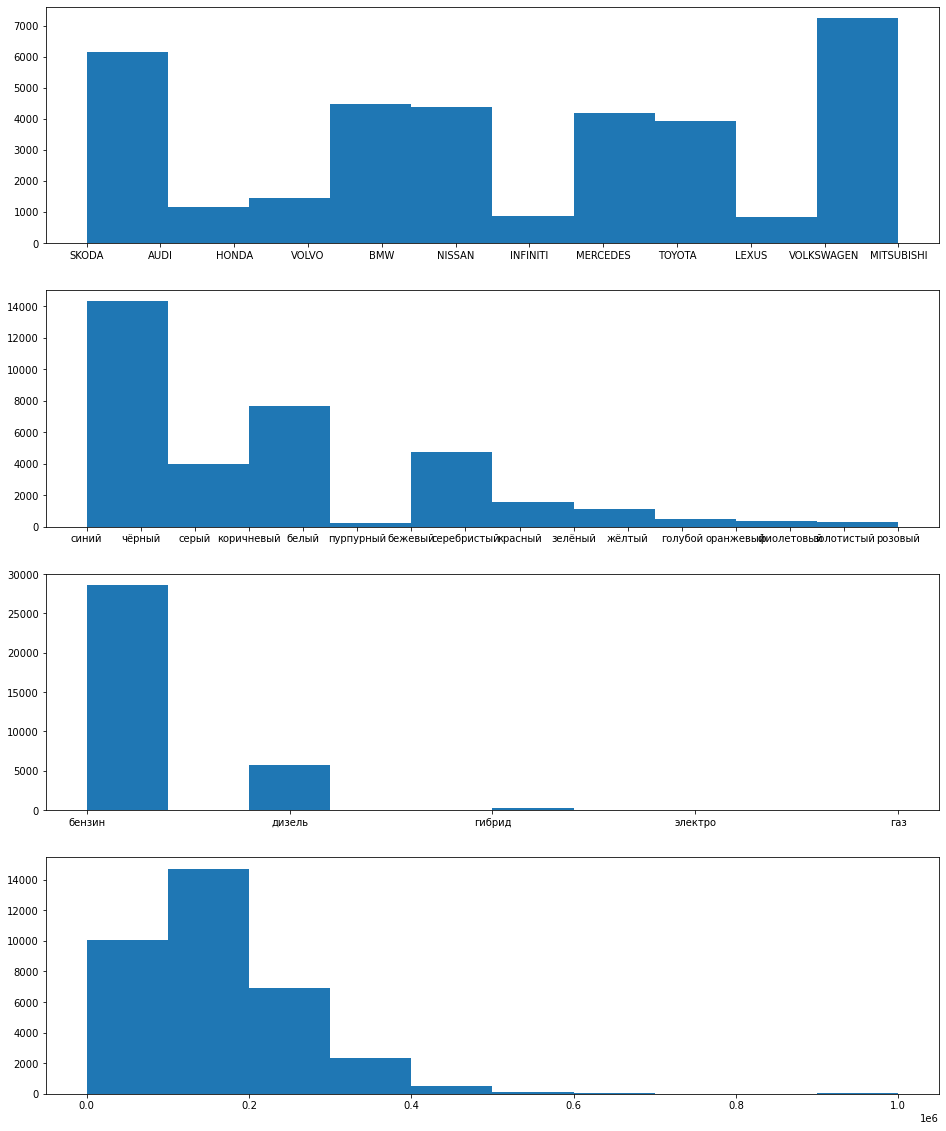

In [72]:
fig = plt.figure(figsize=(16, 20))

plt.subplot(411); plt.hist(test_df['brand'])
plt.subplot(412); plt.hist(test_df['color'])
plt.subplot(413); plt.hist(test_df['fuelType'])
plt.subplot(414); plt.hist(test_df['mileage'])

plt.show()

### Контрольная проверка на пустые значения

Мы забыли проверить какие же колонки имеют пустые значения. Так как мы составили список нужных колонок, изучим их на NaN поля. 

Для единственного сэмпла с пустым значением 'ПТС' мы можем выставить его случайным образом (либо попробовать предположить его из остальных колонок). В данном случае это значение Оригинал.

In [80]:
# выделим список используемых колонок
columns_to_use = ['bodyType', 'brand', 'color', 'engineDisplacement', 'enginePower', 'fuelType', 'mileage', 'modelDate', 
                 'model_name', 'numberOfDoors', 'productionDate', 'sell_id', 'vehicleTransmission', 'vendor', 
                  'Владельцы', 'ПТС', 'Привод', 'Руль']

# обновим тестовый датафрейм
test_df = test_df[columns_to_use]
# отобразим кол-во пустых значений
test_df.isnull().sum()

bodyType               0
brand                  0
color                  0
engineDisplacement     0
enginePower            0
fuelType               0
mileage                0
modelDate              0
model_name             0
numberOfDoors          0
productionDate         0
sell_id                0
vehicleTransmission    0
vendor                 0
Владельцы              0
ПТС                    0
Привод                 0
Руль                   0
dtype: int64

In [78]:
test_df['ПТС'].value_counts()

Оригинал    30099
Дубликат     4587
Name: ПТС, dtype: int64

In [79]:
# Поставим значение ПТС для единственного сэмпла (у которого значение пропущено) 
# на то, что более распространено - Оригинал
test_df.loc[test_df['ПТС'].isna(), 'ПТС'] = 'Оригинал'

### Обработка признаков 

Для engineDisplacement и enginePower напишем функцию, которая просто выделяет первую слово из строки, таким образом избавляясь от слов LTR и N12. Стоит учесть что есть 55 сэмплов, у которых атрибут engineDisplacement указан как пустая строка. Это электроавтомобили, поэтому объем их двигателя не указан; их мы устанавливаем на значение 0. Также переводим данные значения в float.

In [81]:
"""
Вытаскиваем первое слово из строки
Применимо к engineDisplacement и enginePower
"""
def convert_engine_details(value):
    splitted = value.split()
    return float(splitted[0]) if len(splitted) > 1 else 0.0

In [82]:
# трансформируем engineDisplacement и enginePower (объем и мощность двигателя)
test_df['engineDisplacement'] = test_df['engineDisplacement'].apply(convert_engine_details)
test_df['enginePower'] = test_df['enginePower'].apply(convert_engine_details)

### Сохраним результат обработки

In [83]:
test_df.to_csv('data/test_modified.csv', index=None)